data understanding

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set opsi tampilan pandas untuk output yang lebih baik
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [2]:
# --- 3.2.1. Pemuatan Data ---
df = pd.read_csv('diabetes.csv')
df_raw = df.copy()

In [3]:
# --- 3.2.2. Inspeksi Awal Data ---
print("\n5 Baris Pertama Dataset:")
print(df.head())

print("\nInformasi Umum Dataset (tipe data & non-null count):")
df.info()

print("\nStatistik Deskriptif Dataset:")
print(df.describe().T)


5 Baris Pertama Dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35        0  33.6                     0.627   50        1
1            1       85             66             29        0  26.6                     0.351   31        0
2            8      183             64              0        0  23.3                     0.672   32        1
3            1       89             66             23       94  28.1                     0.167   21        0
4            0      137             40             35      168  43.1                     2.288   33        1

Informasi Umum Dataset (tipe data & non-null count):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64

In [4]:
# --- 3.2.3. Identifikasi Kualitas Data ---
print("\nJumlah Missing Values (NaN) per Kolom:")
print(df.isnull().sum())

print("\nJumlah Data Duplikat:")
print(df.duplicated().sum())

cols_with_zero_as_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
print("\nJumlah nilai '0' pada kolom yang seharusnya tidak nol (sebelum penanganan):")
zero_counts = df[cols_with_zero_as_missing].isin([0]).sum()
for col, count in zero_counts.items():
    persen = count / len(df) * 100
    print(f"- {col}: {count} nilai 0 ({persen:.2f}%)" if count > 0 else f"- {col}: Tidak ada nilai 0")


Jumlah Missing Values (NaN) per Kolom:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Jumlah Data Duplikat:
0

Jumlah nilai '0' pada kolom yang seharusnya tidak nol (sebelum penanganan):
- Glucose: 5 nilai 0 (0.65%)
- BloodPressure: 35 nilai 0 (4.56%)
- SkinThickness: 227 nilai 0 (29.56%)
- Insulin: 374 nilai 0 (48.70%)
- BMI: 11 nilai 0 (1.43%)



Visualisasi Distribusi Fitur (Histogram):


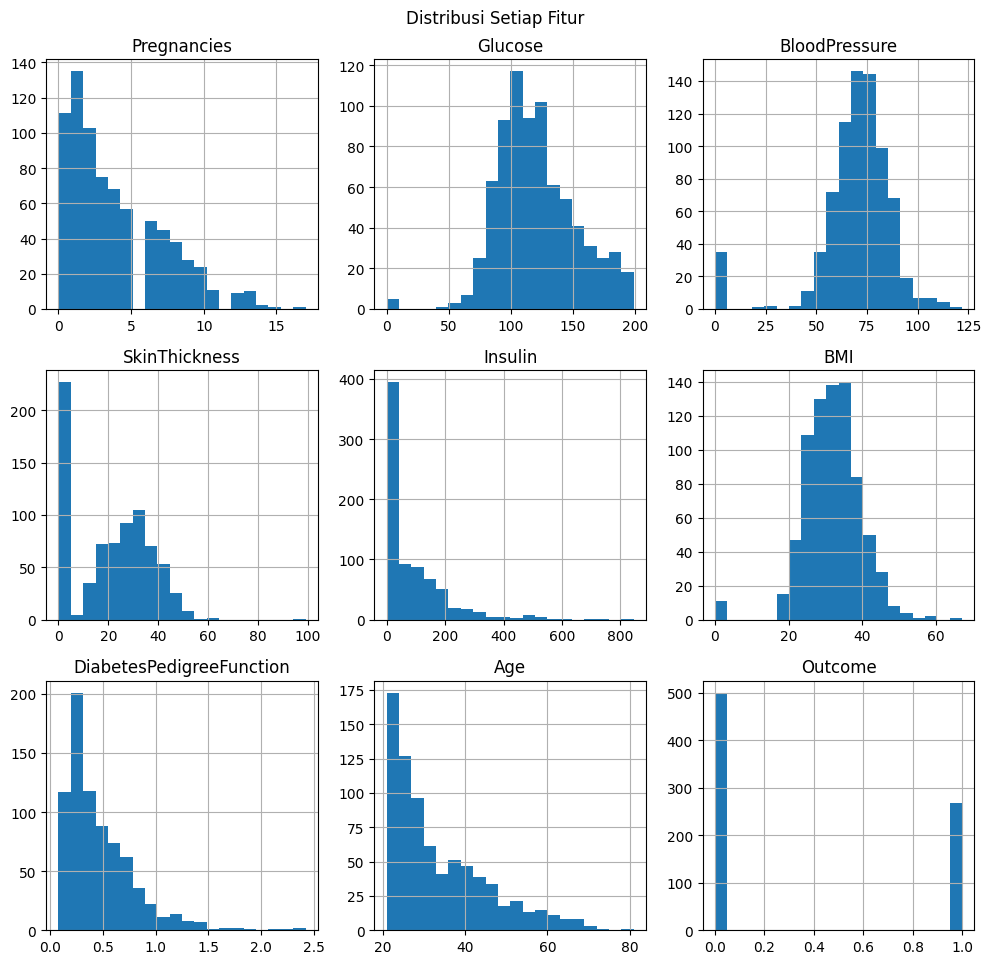

In [5]:
# --- 3.2.4 Eksplorasi dan Visualisasi Data (HISTOGRAM) ---
print("\nVisualisasi Distribusi Fitur (Histogram):")
df.hist(bins=20, figsize=(10, 10))
plt.suptitle("Distribusi Setiap Fitur", y=0.96)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()


Visualisasi Deteksi Outlier (Box Plot):


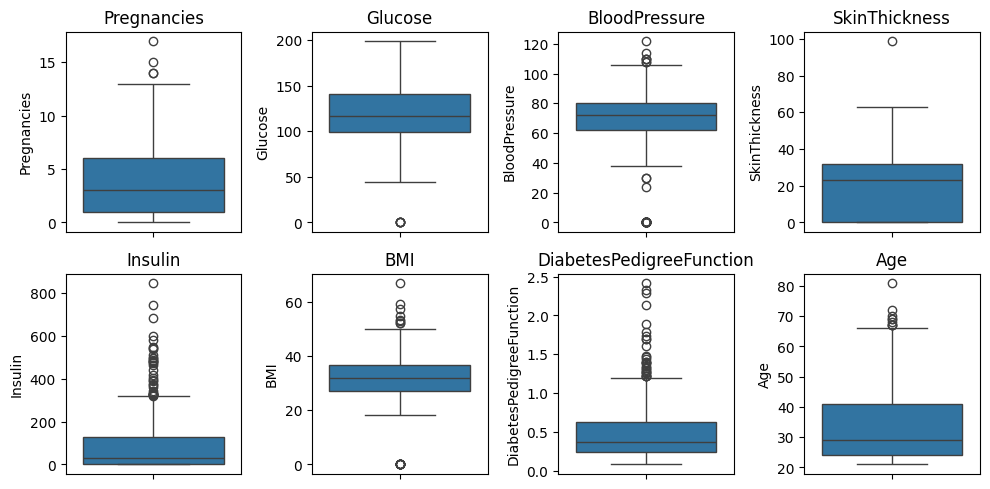

In [6]:
# --- 3.2.4 Eksplorasi dan Visualisasi Data (Boxplot) ---
print("\nVisualisasi Deteksi Outlier (Box Plot):")
plt.figure(figsize=(10, 5))
for i, col in enumerate(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']):
    if col in df.columns:
        plt.subplot(2, 4, i + 1)
        sns.boxplot(y=df[col])
        plt.title(f'{col}')
plt.tight_layout()
plt.show()


Analisis Korelasi (Heatmap):


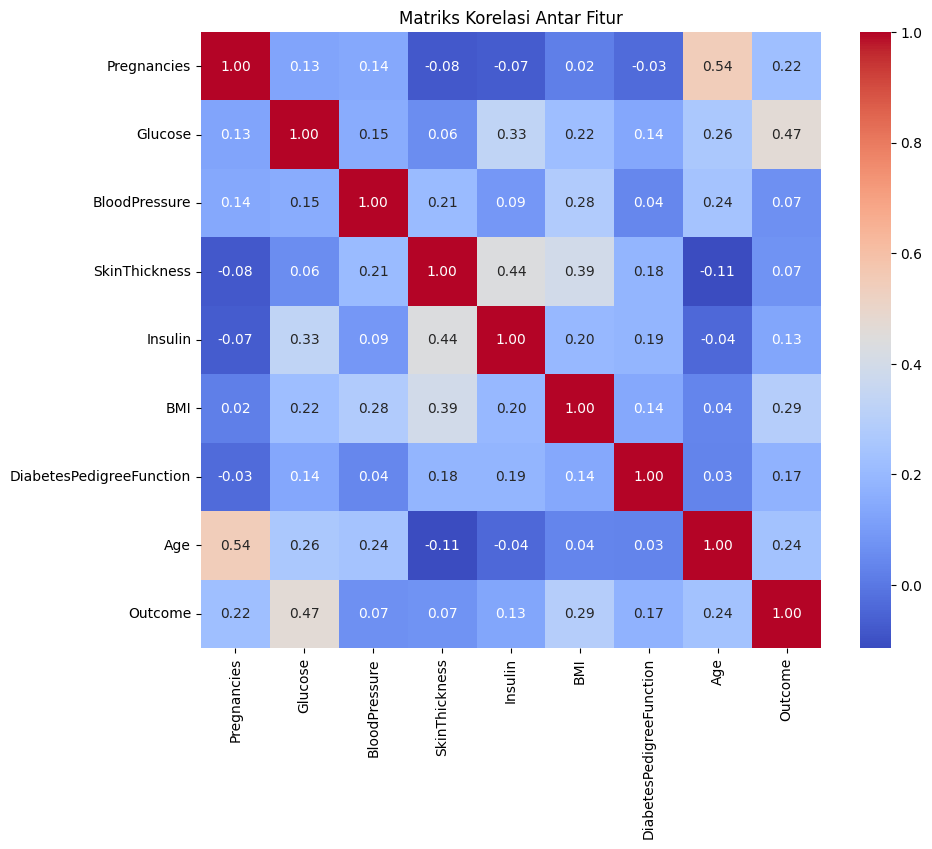

In [7]:
# --- 3.2.4 Eksplorasi dan Visualisasi Data (Heatmap) ---
print("\nAnalisis Korelasi (Heatmap):")
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriks Korelasi Antar Fitur")
plt.show()


Analisis Distribusi Variabel Target (Outcome):
Outcome
0    500
1    268
Name: count, dtype: int64
Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64


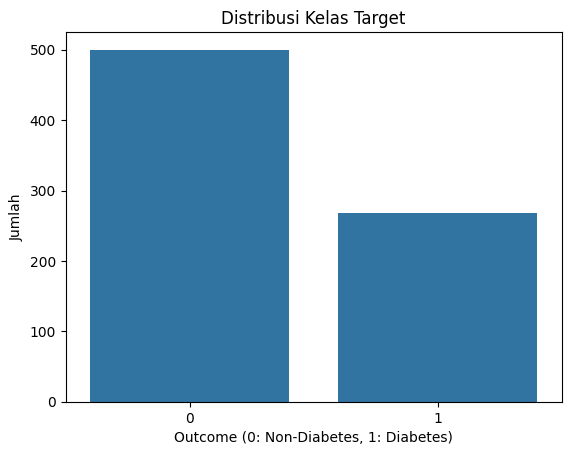

In [8]:
# --- 3.2.4 Eksplorasi dan Visualisasi Data (Outcome) ---
print("\nAnalisis Distribusi Variabel Target (Outcome):")
print(df['Outcome'].value_counts())
print(df['Outcome'].value_counts(normalize=True) * 100)

sns.countplot(x='Outcome', data=df)
plt.title('Distribusi Kelas Target')
plt.xlabel('Outcome (0: Non-Diabetes, 1: Diabetes)')
plt.ylabel('Jumlah')
plt.show()

data preparation

In [9]:
# --- 3.3.1 Penanganan Missing Values ---
df_prepared = df.copy()
print("\nPenanganan Missing Values :")
cols_with_zero_as_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

print("Jumlah nilai 0 pada kolom yang seharusnya tidak nol (sebelum imputasi):")
for col in cols_with_zero_as_missing:
    count_zero = (df_prepared[col] == 0).sum()
    if count_zero > 0:
        print(f"- Kolom '{col}': {count_zero} nilai 0 ({count_zero / len(df_prepared) * 100:.2f}%)")

# Ganti 0 dengan NaN, lalu imputasi dengan median
# Mengubah df_prepared[col].fillna(median_val, inplace=True)
# menjadi df_prepared[col] = df_prepared[col].fillna(median_val) untuk menghindari FutureWaning
for col in cols_with_zero_as_missing:
    df_prepared[col] = df_prepared[col].replace(0, np.nan) # Mengganti 0 dengan NaN
    median_val = df_prepared[col].median()
    df_prepared[col] = df_prepared[col].fillna(median_val) # Mengisi NaN dengan median

print("\nJumlah Missing Values (NaN) setelah imputasi:")
print(df_prepared.isnull().sum())
print("Nilai '0' yang bermasalah berhasil diimputasi dengan median.")


Penanganan Missing Values :
Jumlah nilai 0 pada kolom yang seharusnya tidak nol (sebelum imputasi):
- Kolom 'Glucose': 5 nilai 0 (0.65%)
- Kolom 'BloodPressure': 35 nilai 0 (4.56%)
- Kolom 'SkinThickness': 227 nilai 0 (29.56%)
- Kolom 'Insulin': 374 nilai 0 (48.70%)
- Kolom 'BMI': 11 nilai 0 (1.43%)

Jumlah Missing Values (NaN) setelah imputasi:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Nilai '0' yang bermasalah berhasil diimputasi dengan median.


In [10]:
# --- 3.3.2 Penanganan Outlier ---
def cap_outliers_iqr(df_col):
    Q1 = df_col.quantile(0.25)
    Q3 = df_col.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Batasi nilai di luar batas dengan batas itu sendiri
    df_col = np.where(df_col < lower_bound, lower_bound, df_col)
    df_col = np.where(df_col > upper_bound, upper_bound, df_col)
    return df_col

# Terapkan capping ke semua fitur numerik kecuali 'Outcome'
numeric_cols = df_prepared.select_dtypes(include=np.number).columns.tolist()
if 'Outcome' in numeric_cols:
    numeric_cols.remove('Outcome')

print("Menerapkan capping outlier pada kolom-kolom numerik:")
for col in numeric_cols:
    df_prepared[col] = cap_outliers_iqr(df_prepared[col])
    print(f"- Kolom '{col}' telah di-capping.")

Menerapkan capping outlier pada kolom-kolom numerik:
- Kolom 'Pregnancies' telah di-capping.
- Kolom 'Glucose' telah di-capping.
- Kolom 'BloodPressure' telah di-capping.
- Kolom 'SkinThickness' telah di-capping.
- Kolom 'Insulin' telah di-capping.
- Kolom 'BMI' telah di-capping.
- Kolom 'DiabetesPedigreeFunction' telah di-capping.
- Kolom 'Age' telah di-capping.


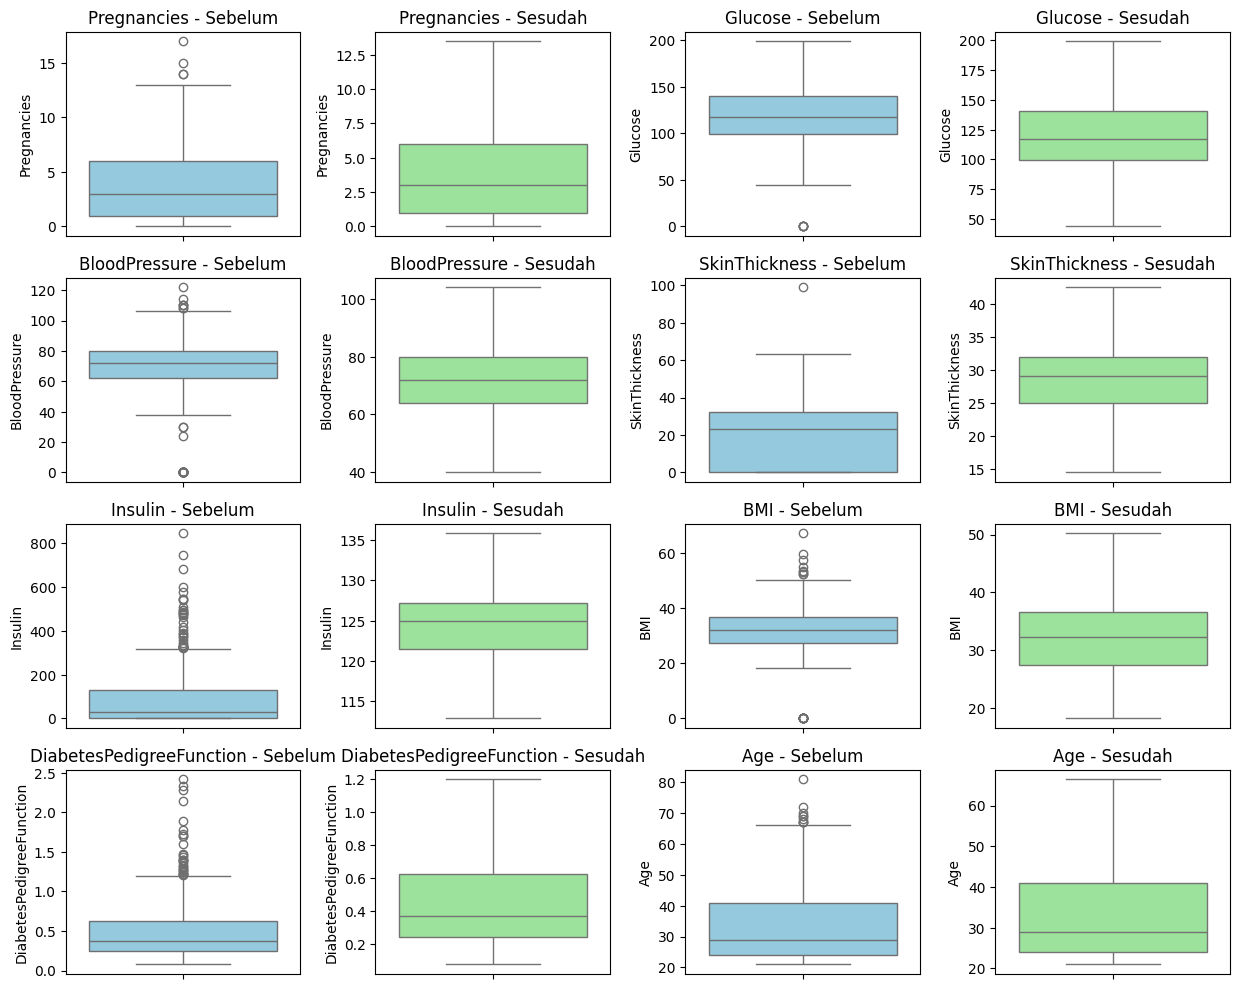

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

fitur = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

plt.figure(figsize=(12.5, 10))

for i, col in enumerate(fitur):
    # Boxplot sebelum capping
    plt.subplot(4, 4, i*2 + 1)
    sns.boxplot(y=df_raw[col], color='skyblue')
    plt.title(f'{col} - Sebelum')
    
    # Boxplot sesudah capping
    plt.subplot(4, 4, i*2 + 2)
    sns.boxplot(y=df_prepared[col], color='lightgreen')
    plt.title(f'{col} - Sesudah')

plt.tight_layout()
plt.show()

In [12]:
# --- 3.3.3 Pembagian Data Latih dan Uji ---
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Pemisahan Fitur (X) dan Target (y)
X = df_prepared.drop('Outcome', axis=1)
y = df_prepared['Outcome']

# test_size=0.2 (20% untuk pengujian), random_state untuk reproduktibilitas, stratify=y untuk menjaga proporsi kelas
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Jumlah data pelatihan: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"Jumlah data pengujian: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")
print(f"Proporsi kelas '0' di y_train: {y_train.value_counts(normalize=True)[0]:.2f}")
print(f"Proporsi kelas '0' di y_test: {y_test.value_counts(normalize=True)[0]:.2f}")

Jumlah data pelatihan: 614 (79.9%)
Jumlah data pengujian: 154 (20.1%)
Proporsi kelas '0' di y_train: 0.65
Proporsi kelas '0' di y_test: 0.65


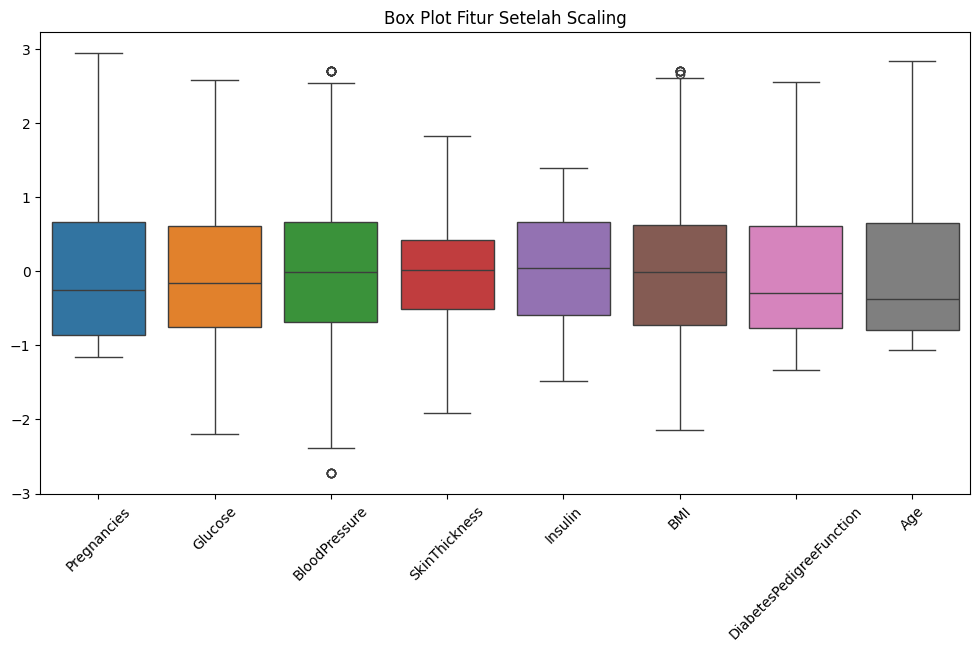

In [13]:
# --- 3.3.4 Scaling fitur ---
from sklearn.preprocessing import StandardScaler

# Scaling fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ubah ke DataFrame agar gampang akses kolom dan index
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

# --- Visualisasi data setelah scaling ---
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=X_train_scaled_df)
plt.title("Box Plot Fitur Setelah Scaling")
plt.xticks(rotation=45)
plt.show()

In [14]:
# --- 3.3.5 Seleksi fitur dengan RFE ---
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Seleksi fitur dengan RFE (misal memilih 5 fitur terbaik)
rfe_estimator = RandomForestClassifier(random_state=42)
rfe_selector = RFE(estimator=rfe_estimator, n_features_to_select=5)
rfe_selector.fit(X_train_scaled_df, y_train)

selected_features = X_train_scaled_df.columns[rfe_selector.support_].tolist()
print(f"Fitur terpilih: {selected_features}")

# Data fitur akhir setelah seleksi
X_train_final = X_train_scaled_df[selected_features]
X_test_final = X_test_scaled_df[selected_features]


Fitur terpilih: ['Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age']


Modeling

In [15]:
# --- 3.4.1 Penyeimbangan Data Latih (SMOTE) ---
from imblearn.over_sampling import SMOTE

print("Memulai proses penyeimbangan data latih...")

# 1. Tampilkan distribusi kelas SEBELUM SMOTE
print("\nDistribusi kelas SEBELUM SMOTE:")
print(y_train.value_counts())

# 2. Inisialisasi dan terapkan SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_final, y_train)

# 3. Tampilkan distribusi kelas SETELAH SMOTE
print("\nDistribusi kelas SETELAH SMOTE:")
print(y_train_balanced.value_counts())

print("\n--- Proses Penyeimbangan Selesai ---")
print("--- Blok 1 Selesai ---")

Memulai proses penyeimbangan data latih...

Distribusi kelas SEBELUM SMOTE:
Outcome
0    400
1    214
Name: count, dtype: int64

Distribusi kelas SETELAH SMOTE:
Outcome
0    400
1    400
Name: count, dtype: int64

--- Proses Penyeimbangan Selesai ---
--- Blok 1 Selesai ---


In [16]:
# --- 3.4.2 Hyperparameter Tuning (Optimasi) ---
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier


# Tentukan rentang hyperparameter yang ingin diuji
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Inisialisasi model dasar.
# PENTING: Hapus class_weight='balanced' karena data sudah ditangani SMOTE.
rf_estimator = RandomForestClassifier(random_state=42, n_jobs=-1)

# Siapkan strategi cross-validation
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_estimator,
    param_grid=param_grid,
    cv=cv_strategy,
    scoring='recall', # Kita optimalkan untuk recall kelas 1
    n_jobs=-1,
    verbose=2
)

# Jalankan pencarian pada data latih yang sudah seimbang
grid_search.fit(X_train_balanced, y_train_balanced)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='recall', verbose=2)

In [17]:
# --- 3.4.3 Mendapatkan Model Terbaik dan Prediksi ---

# Tampilkan hyperparameter terbaik yang ditemukan
print(f"Hyperparameter Terbaik: {grid_search.best_params_}")
print(f"Skor Recall CV Terbaik: {grid_search.best_score_:.4f}")

# Ambil model terbaik yang sudah dilatih secara otomatis oleh GridSearchCV
final_model = grid_search.best_estimator_

# Gunakan model final untuk membuat prediksi pada data uji (X_test_final)
print("\nMelakukan prediksi pada data uji...")
y_pred_final_tuned = final_model.predict(X_test_final)
print("Prediksi selesai.")

Hyperparameter Terbaik: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Skor Recall CV Terbaik: 0.8650

Melakukan prediksi pada data uji...
Prediksi selesai.


Mengevaluasi performa teknis dari model terbaik...
--- Laporan Evaluasi untuk: Final Tuned Model ---
Classification Report:
                  precision    recall  f1-score   support

Non-Diabetes (0)       0.82      0.80      0.81       100
    Diabetes (1)       0.65      0.69      0.67        54

        accuracy                           0.76       154
       macro avg       0.74      0.74      0.74       154
    weighted avg       0.76      0.76      0.76       154


Confusion Matrix:


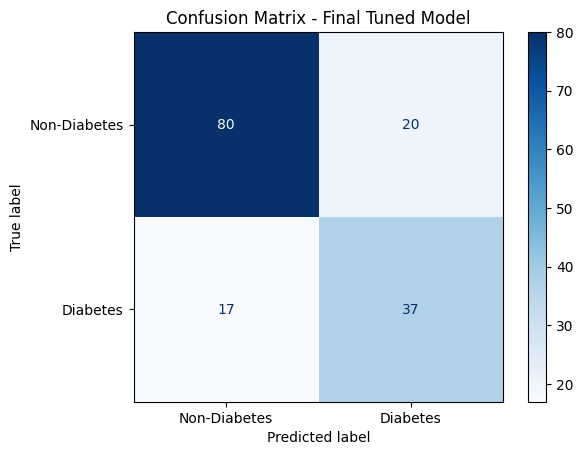

In [18]:
# --- 3.4.4 Penilaian Performa Model Final ---

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Definisikan kembali fungsi evaluasi untuk memastikan kode berjalan mandiri
def evaluate_model(y_true, y_pred, model_name):
    """
    Menampilkan classification report dan confusion matrix.
    """
    print(f"--- Laporan Evaluasi untuk: {model_name} ---")
    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=['Non-Diabetes (0)', 'Diabetes (1)']))
    print("\nConfusion Matrix:")
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred, cmap='Blues', display_labels=['Non-Diabetes', 'Diabetes'])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Panggil fungsi evaluasi untuk model final yang sudah di-tuning
# Pastikan y_test dan y_pred_final_tuned sudah tersedia dari blok sebelumnya
print("Mengevaluasi performa teknis dari model terbaik...")
evaluate_model(y_test, y_pred_final_tuned, "Final Tuned Model")

evaluasi


--- 5.1 Prediksi pada Data Uji ---
Prediksi pada data uji telah dilakukan.

--- 5.2 Metrik Evaluasi Model ---

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       100
           1       0.65      0.69      0.67        54

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154

Akurasi Model (Testing): 0.7597
Balanced Accuracy (Testing): 0.7426
ROC-AUC Score (Testing): 0.8358

--- 5.3.1 Confusion Matrix ---


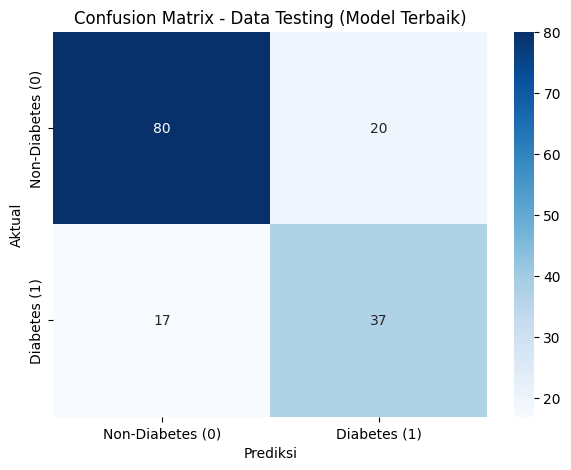


--- 5.3.2 ROC Curve ---


<Figure size 700x600 with 0 Axes>

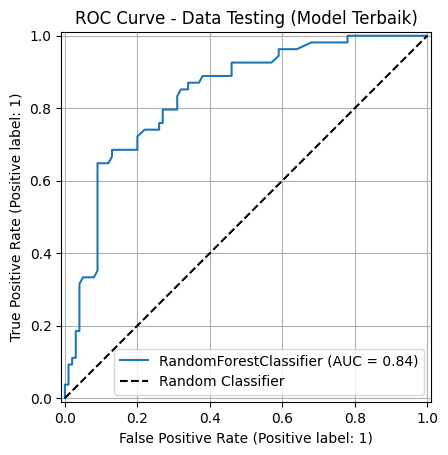


--- 5.4 Analisis Feature Importance ---
                    Feature  Importance
0                   Glucose    0.321746
2                       BMI    0.234753
4                       Age    0.172187
3  DiabetesPedigreeFunction    0.153298
1             BloodPressure    0.118017


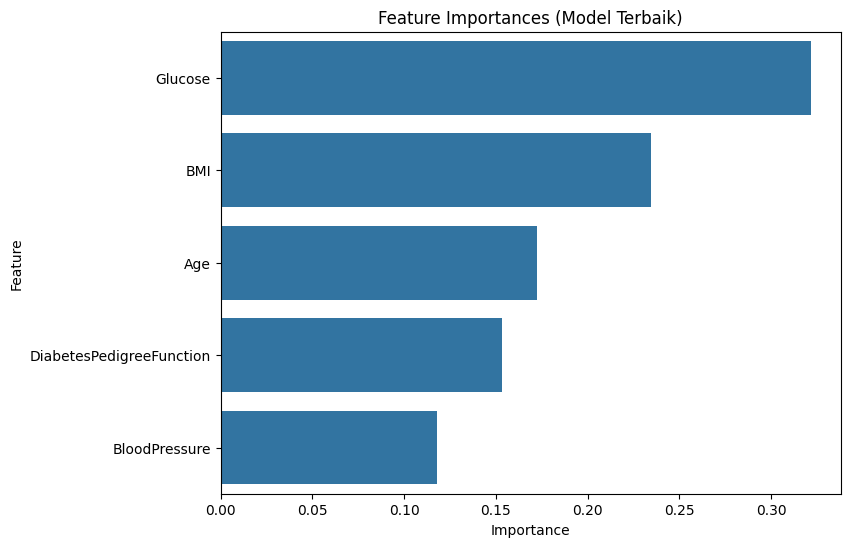


=== Tahap Evaluation Selesai ===



In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    roc_auc_score,
    RocCurveDisplay,
    balanced_accuracy_score
)

# ===============================
# Tahap 5: Evaluation
# ===============================

# --- 3.5.1 Prediksi pada Data Uji ---
print("\n--- 5.1 Prediksi pada Data Uji ---")
y_test_pred = final_model.predict(X_test_final)
y_test_pred_proba = final_model.predict_proba(X_test_final)[:, 1]
print("Prediksi pada data uji telah dilakukan.")

# --- 3.5.2 Metrik Evaluasi Model ---
print("\n--- 5.2 Metrik Evaluasi Model ---")
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

print(f"Akurasi Model (Testing): {accuracy_score(y_test, y_test_pred):.4f}")
print(f"Balanced Accuracy (Testing): {balanced_accuracy_score(y_test, y_test_pred):.4f}")
print(f"ROC-AUC Score (Testing): {roc_auc_score(y_test, y_test_pred_proba):.4f}")

# --- 3.5.3 Visualisasi Kinerja Model ---

# Visualisasi Confusion Matrix
print("\n--- 5.3.1 Confusion Matrix ---")
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues",
    xticklabels=['Non-Diabetes (0)', 'Diabetes (1)'],
    yticklabels=['Non-Diabetes (0)', 'Diabetes (1)']
)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix - Data Testing (Model Terbaik)")
plt.show()

# Visualisasi ROC Curve
print("\n--- 5.3.2 ROC Curve ---")
plt.figure(figsize=(7, 6))
RocCurveDisplay.from_estimator(final_model, X_test_final, y_test)
plt.title('ROC Curve - Data Testing (Model Terbaik)')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.legend()
plt.grid(True)
plt.show()

# --- 3.5.4 Analisis Feature Importance ---
print("\n--- 5.4 Analisis Feature Importance ---")
importances = final_model.feature_importances_
features = X_train_final.columns
feature_importances_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

print(feature_importances_df)

plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title("Feature Importances (Model Terbaik)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

print("\n=== Tahap Evaluation Selesai ===\n")


deployment

In [ ]:
# # 1--- Membuat & Menyimpan Scaler Final yang Sesuai dengan Model ---
from sklearn.preprocessing import StandardScaler
import joblib

# # 1'selected_features' adalah daftar fitur yang dipilih oleh RFE
# # 1Contoh: ['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction', 'BloodPressure']
print(f"Fitur yang akan digunakan untuk scaler & model final: {selected_features}")

# # 1. Filter data training HANYA dengan fitur terpilih
X_train_for_scaling = X_train[selected_features]

# # 2. Buat dan latih (fit) scaler BARU pada data yang sudah difilter
final_scaler = StandardScaler()
final_scaler.fit(X_train_for_scaling)

# # 3. Simpan scaler BARU ini
nama_file_scaler_final = 'scaler_final.joblib'
joblib.dump(final_scaler, nama_file_scaler_final)

print(f"\nScaler final yang sesuai telah disimpan ke dalam file: '{nama_file_scaler_final}'")

In [24]:
# Pastikan df_prepared (data yang sudah dibersihkan & di-cap) sudah tersedia
# Pastikan selected_features (daftar nama fitur pilihan RFE) sudah tersedia

# 1. Ambil 5 baris data pertama (indeks 0-4) dari data yang sudah bersih
data_awal = df_prepared.loc[0:4]

# 2. Buat DataFrame baru hanya dengan fitur-fitur yang terpilih oleh RFE
#    dan tambahkan kolom 'Outcome' untuk referensi
data_final_untuk_uji = data_awal[selected_features + ['Outcome']]

# 3. Tampilkan hasilnya
print("Tampilan 5 data asli pertama (indeks 0-4) setelah diproses (fitur terpilih & angka normal):")
display(data_final_untuk_uji)

Tampilan 5 data asli pertama (indeks 0-4) setelah diproses (fitur terpilih & angka normal):


,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148.0,72.0,33.6,0.627,50.0,1
1,85.0,66.0,26.6,0.351,31.0,0
2,183.0,64.0,23.3,0.672,32.0,1
3,89.0,66.0,28.1,0.167,21.0,0
4,137.0,40.0,43.1,1.200,33.0,1
